Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

 --データラベル--
1.0    169
0.0    128
Name: success, dtype: int64


findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.


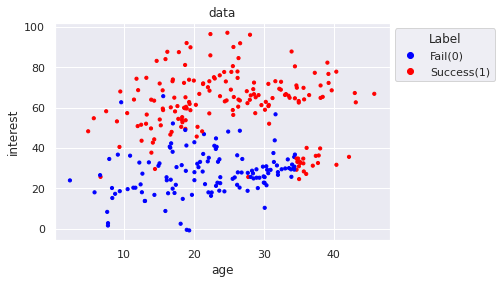

In [1]:
# CSVデータの読み込み(KaggleからからBeginner's Classification Datasetを持ってきた)
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd 
data= pd.read_csv("drive/MyDrive/classification/classification.csv")#データの入力
print("\n","--データラベル--")
print(data["success"].value_counts())

#matplotlibで可視化
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(font='IPAexGothic')
colors = {0:'Blue', 1:'red'}
plt.scatter(data["age"].astype(float),data["interest"].astype(float),c=data["success"].map(colors),s=10)

plt.title("data")
plt.xlabel('age')
plt.ylabel('interest')

legend = [plt.plot([], [], marker='o', ls='', color=colors[i], label=l)[0] for i, l in enumerate(['Fail(0)', 'Success(1)'])]
plt.legend(handles=legend, title='Label', loc='upper left', bbox_to_anchor=(1,1))

plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

 --データラベル--
1.0    169
0.0    128
Name: success, dtype: int64
test score(RFC) :  0.92
200 問中 184 問正解


findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.


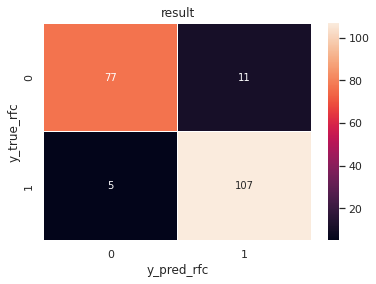

test score(決定木) :  0.855
200 問中 171 問正解


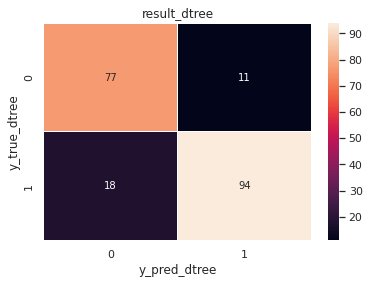

test score(svc) :  0.865
200 問中 173 問正解


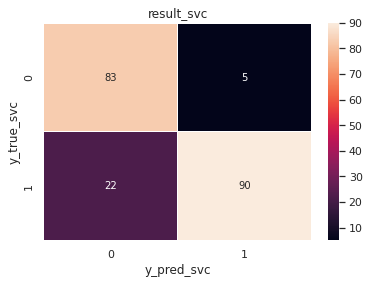

test score(ロジスティック) :  0.86
200 問中 172 問正解


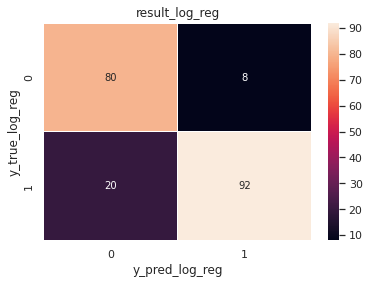

In [2]:
# CSVデータの読み込み(KaggleからからBeginner's Classification Datasetを持ってきた)
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd 
data= pd.read_csv("drive/MyDrive/classification/classification.csv")#データの入力
print("\n","--データラベル--")
print(data["success"].value_counts())


y=data["success"]#目的関数
x=data.drop(["success"],axis=1)#目的関数以外

from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test = tts(x,y,test_size = 200)#test_sizeは変更

#matplotlibで可視化
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


#RFC
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(random_state=0)
RFC.fit(x_train, y_train)#学習
#print('train score : ', RFC.score(x_train, y_train))
print('test score(RFC) : ', RFC.score(x_test, y_test))
print(len(y_test),'問中',int(len(y_test) * RFC.score(x_test, y_test)),'問正解')

#可視化(RFC)
from sklearn.metrics import confusion_matrix
y_pred_rfc = RFC.predict(x_test)
y_true_rfc = y_test
cm_rfc = confusion_matrix(y_true_rfc, y_pred_rfc)
sns.heatmap(cm_rfc,annot = True,linewidths=0.5,fmt = ".0f")#数値表記、桁合わせ
plt.title("result")
plt.xlabel("y_pred_rfc")
plt.ylabel("y_true_rfc")
plt.show()

# 決定木
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)#学習
#print('train score : ', dtree.score(x_train, y_train))
print('test score(決定木) : ', dtree.score(x_test, y_test))
print(len(y_test),'問中',int(len(y_test) * dtree.score(x_test, y_test)),'問正解')

#可視化(決定木)
y_pred_dtree = dtree.predict(x_test)
y_true_dtree = y_test
cm_dtree = confusion_matrix(y_true_dtree, y_pred_dtree)
sns.heatmap(cm_dtree,annot = True,linewidths=0.5,fmt = ".0f")#数値表記、桁合わせ
plt.title("result_dtree")
plt.xlabel("y_pred_dtree")
plt.ylabel("y_true_dtree")
plt.show()

#SVC
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)#学習
#print('train score : ', svc.score(x_train, y_train))
print('test score(svc) : ', svc.score(x_test, y_test))
print(len(y_test),'問中',int(len(y_test) * svc.score(x_test, y_test)),'問正解')

#可視化(SVC)
y_pred_svc = svc.predict(x_test)
y_true_svc = y_test
cm_svc = confusion_matrix(y_true_svc, y_pred_svc)
sns.heatmap(cm_svc,annot = True,linewidths=0.5,fmt = ".0f")#数値表記、桁合わせ
plt.title("result_svc")
plt.xlabel("y_pred_svc")
plt.ylabel("y_true_svc")
plt.show()

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C=1.0)
log_reg.fit(x_train, y_train)#学習
#print('train score : ', log_reg.score(x_train, y_train))
print('test score(ロジスティック) : ', log_reg.score(x_test, y_test))
print(len(y_test),'問中',int(len(y_test) * log_reg.score(x_test, y_test)),'問正解')

#可視化(ロジスティック)
y_pred_log_reg = log_reg.predict(x_test)
y_true_log_reg = y_test
cm_log_reg = confusion_matrix(y_true_log_reg, y_pred_log_reg)
sns.heatmap(cm_log_reg,annot = True,linewidths=0.5,fmt = ".0f")#数値表記、桁合わせ
plt.title("result_log_reg")
plt.xlabel("y_pred_log_reg")
plt.ylabel("y_true_log_reg")
plt.show()